In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [4]:
# Load the dataset
df = pd.read_excel(r'/FRAUD/ccfraudTrain.xlsx')

df1 = pd.read_excel(r'/FRAUD/ccfraudTest.xlsx')
# For snakey diagram
#df1 = pd.read_excel(r'C:\Users\sg_cl\Desktop\masters subjects\DSRT 736\Fraud Dataset\New_data_CCFD\Sankey_data.xlsx')

# Data Profile

In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
print("Missing values:", df.isnull().sum())

Missing values: Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# checking the dataset
df.info()
df.describe()
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1048575 non-null  int64         
 1   trans_date_trans_time  1048575 non-null  datetime64[ns]
 2   cc_num                 1048575 non-null  int64         
 3   merchant               1048575 non-null  object        
 4   category               1048575 non-null  object        
 5   amt                    1048575 non-null  float64       
 6   first                  1048575 non-null  object        
 7   last                   1048575 non-null  object        
 8   gender                 1048575 non-null  object        
 9   street                 1048575 non-null  object        
 10  city                   1048575 non-null  object        
 11  state                  1048575 non-null  object        
 12  zip                    10485

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755301,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [6]:
#print (df['trans_date_trans_time'].head())
from datetime import datetime as dt
import pytz  # Import the pytz module for time zones

df['trans_date_trans_time_HR'] = df['trans_date_trans_time'].dt.strftime("%H")

# Convert the Unix time values to datetime objects
df['unix_time_NEW'] = df['unix_time'].apply(lambda x: dt.fromtimestamp(x))

# Set the time zone to the desired time zone (e.g., 'UTC' or your local time zone)
local_time_zone = 'America/New_York'
df['unix_time_NEW'] = df['unix_time_NEW'].dt.tz_localize(pytz.utc).dt.tz_convert(local_time_zone)


print (df.head())

df1['trans_date_trans_time_HR'] = df1['trans_date_trans_time'].dt.strftime("%H")

# Convert the Unix time values to datetime objects
df1['unix_time_NEW'] = df1['unix_time'].apply(lambda x: dt.fromtimestamp(x))

# Set the time zone to the desired time zone (e.g., 'UTC' or your local time zone)
local_time_zone = 'America/New_York'
df1['unix_time_NEW'] = df1['unix_time_NEW'].dt.tz_localize(pytz.utc).dt.tz_convert(local_time_zone)


print (df1.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652090   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... city_pop  \
0    Banks      F                561 Perry Cove  ...     3495   
1     Gill      F  43039 Riley Greens Suite 393  ...      149   
2  Sanchez 

In [7]:
df = df.drop('unix_time', axis=1)
df = df.drop('unix_time_NEW', axis=1)
df1 = df1.drop('unix_time', axis=1)
df1 = df1.drop('unix_time_NEW', axis=1)
#df = df.drop('Errors?', axis=1)
#df = df.drop('Time', axis=1)


In [88]:
# Assuming 'df' is your dataframe
df['weight'] = 1  # Initialize weight column with default value

# Define the time range for higher weight (10 PM to 3 AM)
start_time = 22  # 10 PM
end_time = 3     # 3 AM

# Apply higher weight to transactions within the specified time range
df.loc[(df['trans_date_trans_time_HR'] >= start_time) | (df['trans_date_trans_time_HR'] <= end_time), 'weight'] = 2

In [16]:
#print (df.head())
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date_trans_time_HR', 'weight'],
      dtype='object')

In [9]:
print(df.corr())
df.columns

<ipython-input-9-44f788a184a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


            Unnamed: 0    cc_num       amt       zip       lat      long  \
Unnamed: 0    1.000000  0.000575 -0.001397  0.001207 -0.000781 -0.001047   
cc_num        0.000575  1.000000  0.000760  0.041448 -0.058910 -0.047945   
amt          -0.001397  0.000760  1.000000  0.001567 -0.001916  0.000151   
zip           0.001207  0.041448  0.001567  1.000000 -0.113957 -0.909957   
lat          -0.000781 -0.058910 -0.001916 -0.113957  1.000000 -0.016041   
long         -0.001047 -0.047945  0.000151 -0.909957 -0.016041  1.000000   
city_pop     -0.000856 -0.008993  0.006485  0.079164 -0.156069 -0.053443   
merch_lat    -0.000690 -0.058611 -0.001832 -0.113250  0.993598 -0.015967   
merch_long   -0.001045 -0.047925  0.000156 -0.909147 -0.016033  0.999120   
is_fraud     -0.009041 -0.002301  0.218417 -0.001844  0.001355  0.002030   

            city_pop  merch_lat  merch_long  is_fraud  
Unnamed: 0 -0.000856  -0.000690   -0.001045 -0.009041  
cc_num     -0.008993  -0.058611   -0.047925 -0.0023

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date_trans_time_HR'],
      dtype='object')

In [9]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 76.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9f2f3ad894b33feb1de2e29634b80401f4b0c895b3a84dc282f93a260169c320
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [10]:
import pandas as pd
from pandas_profiling import ProfileReport

# Assuming 'df' is your dataframe
profile = ProfileReport(df)
profile.to_file("data_profile_report.html")

<ipython-input-10-157f6a9521e5>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

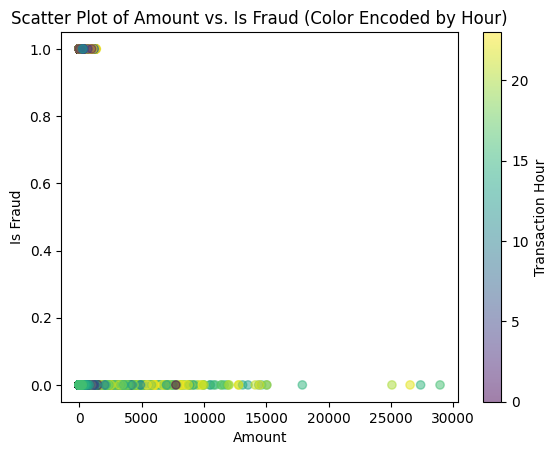

In [13]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
plt.scatter(df['amt'], df['is_fraud'], alpha=0.5)
plt.title('Scatter Plot of Amount vs. Fraud')
plt.xlabel('Amount')
plt.ylabel('Is Fraud')
plt.show()

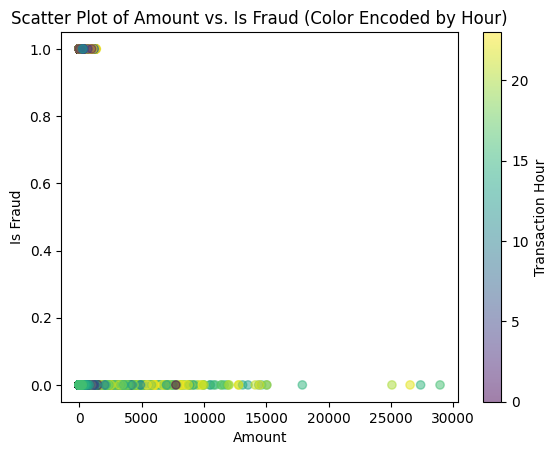

In [49]:
# Assuming 'df' is your dataframe
df['trans_date_trans_time_HR'] = df['trans_date_trans_time_HR'].astype(int)

plt.scatter(df['amt'], df['is_fraud'], c=df['trans_date_trans_time_HR'], alpha=0.5, cmap='viridis')
plt.title('Scatter Plot of Amount vs. Is Fraud (Color Encoded by Hour)')
plt.xlabel('Amount')
plt.ylabel('Is Fraud')
plt.colorbar(label='Transaction Hour')
plt.show()


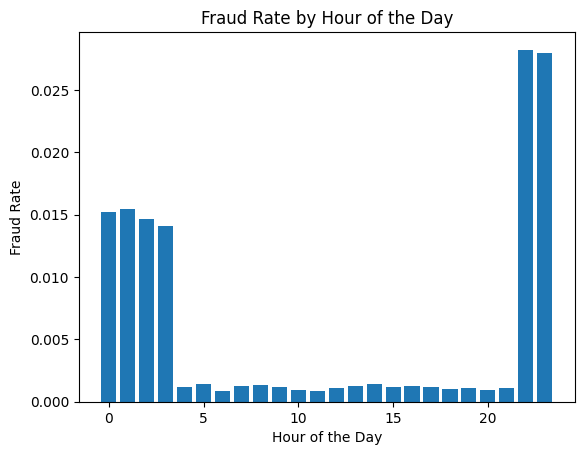

In [14]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
fraud_by_hour = df.groupby('trans_date_trans_time_HR')['is_fraud'].mean()

plt.bar(fraud_by_hour.index, fraud_by_hour.values)
plt.title('Fraud Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate')
plt.show()


In [89]:
# Sample dataset 1
# Convert 'Timestamp' column to datetime type
#main_df['Timestamp'] = pd.to_datetime(main_df['Timestamp'])

# Select the desired columns and perform aggregation on the subset
subset_df = df[[ 'cc_num', 'trans_date_trans_time_HR', 'merchant', 'category', 'gender','state','lat', 'long','merch_lat',
       'merch_long', 'amt','weight','is_fraud']].reset_index()
subset_df1 = df1[[ 'cc_num', 'trans_date_trans_time_HR', 'merchant', 'category', 'gender','state','lat', 'long','merch_lat',
       'merch_long', 'amt','is_fraud']].reset_index()

In [53]:
subset_df.head()

,index,cc_num,trans_date_trans_time_HR,merchant,category,gender,state,lat,long,merch_lat,merch_long,amt,weight,is_fraud
0,0,2703186189652090,0,"fraud_Rippin, Kub and Mann",misc_net,F,NC,36.0788,-81.1781,36.011293,-82.048315,4.97,5,0
1,1,630423337322,0,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,WA,48.8878,-118.2105,49.159047,-118.186462,107.23,5,0
2,2,38859492057661,0,fraud_Lind-Buckridge,entertainment,M,ID,42.1808,-112.2620,43.150704,-112.154481,220.11,5,0
3,3,3534093764340240,0,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,MT,46.2306,-112.1138,47.034331,-112.561071,45.00,5,0
4,4,375534208663984,0,fraud_Keeling-Crist,misc_pos,M,VA,38.4207,-79.4629,38.674999,-78.632459,41.96,5,0


In [ ]:
# Define features (X) and target variable (y)
X = subset_df[['trans_date_trans_time_HR', 'lat', 'long', 'merch_lat', 'merch_long']]
y = subset_df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Predict 'is_fraud' for the test set
y_pred = logistic_regression_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix and Classification Report
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {roc_auc}")
print("\nConfusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9943685477910498
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.5

Confusion Matrix:
 [[208534      0]
 [  1181      0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    208534
           1       0.00      0.00      0.00      1181

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# Convert categorical variables to numerical using one-hot encoding
subset_df = pd.get_dummies(subset_df, columns=['merchant', 'category', 'gender', 'state'])

subset_df1 = pd.get_dummies(subset_df1, columns=['merchant', 'category', 'gender', 'state'])

In [61]:
#subset_df.head()
subset_df = subset_df.drop('state_DE', axis=1)
#subset_df1.head()
#subset_df1['state_DE'] = 0

In [ ]:
#Data pre processing String values to Int values
#print(df['Is Fraud?'].unique())
y = df['Is Fraud?']
enc = preprocessing.LabelEncoder()
enc.fit(y)
y = enc.transform(y)
print(y)


# Separate features (X) and labels (y)
X = df.drop('Is Fraud?', axis=1)
print(X.head())
print(y)

KeyError: ignored

In [91]:
# Split data into features (X) and target (y)
X = subset_df.drop('is_fraud', axis=1)
y = subset_df['is_fraud']

X1 = subset_df1.drop('is_fraud', axis=1)
y1 = subset_df1['is_fraud']

In [21]:
print("Missing values:", df.isnull().sum())

Missing values: Unnamed: 0                  0
trans_date_trans_time       0
cc_num                      0
merchant                    0
category                    0
amt                         0
first                       0
last                        0
gender                      0
street                      0
city                        0
state                       0
zip                         0
lat                         0
long                        0
city_pop                    0
job                         0
dob                         0
trans_num                   0
merch_lat                   0
merch_long                  0
is_fraud                    0
trans_date_trans_time_HR    0
weight                      0
dtype: int64


In [92]:
# Assuming 'df' is your dataframe
weights = df['weight']


In [80]:
# Split the dataset into training, validation, and test sets

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, stratify=y, test_size=0.2, random_state=42)

#X_val,X_test,y_val, y_test = train_test_split(X1, y1,test_size=0.5, stratify=y1, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [29]:
# Print the shapes of the resulting subsets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (838860, 768) (838860,)
Test set shape: (209715, 768) (209715,)


In [93]:
# Create a linear regression model
# = LinearRegression()
# Define class weights (adjust these based on your problem)
genuine_weight = 1.0 #6006 / (1042569 + 6006)
fraud_weight = 9.0 #1042569 / (1042569 + 6006)

class_weights = {0: genuine_weight, 1: fraud_weight}
#class_weights = {0: 1.0, 1: 10.0}
# Initialize and train the logistic regression model
logistic_regression_model = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,class_weight=class_weights, random_state=42,n_jobs=-1,max_samples=0.8)
model3 = RandomForestClassifier(n_estimators=80,class_weight=class_weights, random_state=42,n_jobs=-1,max_samples=0.8)

In [ ]:
model1 = RandomForestClassifier(n_estimators=30,class_weight=class_weights, random_state=42,n_jobs=-1,max_samples=0.8)


In [ ]:
model2 = RandomForestClassifier(n_estimators=70,class_weight=class_weights, random_state=42,n_jobs=-1,max_samples=0.8)


In [35]:
model3 = RandomForestClassifier(n_estimators=80,class_weight=class_weights, random_state=42,n_jobs=-1,max_samples=0.8)

In [ ]:
model4 = RandomForestClassifier(n_estimators=90,class_weight=class_weights, random_state=42,n_jobs=-1,max_samples=0.8)

In [ ]:


best_model = None
best_score = 0
best_max_samples = 0

# Define class weights (adjust these based on your problem)
genuine_weight = 1.0
fraud_weight = 9.0
class_weights = {0: genuine_weight, 1: fraud_weight}

for max_samples_int in range(1, 9):  # max_samples range from 1 to 8
    max_samples_proportion = max_samples_int / 10.0

    # Initialize the RandomForestClassifier with current hyperparameters
    model = RandomForestClassifier(
        n_estimators=80,
        class_weight=class_weights,
        random_state=42,
        n_jobs=-1,
        max_samples=max_samples_proportion
    )

    # Evaluate the model using cross-validation (you can use a different scoring metric if needed)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    # Calculate the mean score
    mean_score = scores.mean()

    print(f"Max Samples Proportion: {max_samples_proportion}, Mean F1 Score: {mean_score}")

    # Update best model if needed
    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        best_max_samples = max_samples_proportion

# Train the best model on the entire dataset
best_model.fit(X_train, y_train)

print(f"\nBest Max Samples Proportion: {best_max_samples}")


Max Samples Proportion: 0.1, Mean F1 Score: 0.5051538355058052
Max Samples Proportion: 0.2, Mean F1 Score: 0.594160829778221
Max Samples Proportion: 0.3, Mean F1 Score: 0.6294244704290082
Max Samples Proportion: 0.4, Mean F1 Score: 0.6511665526120738
Max Samples Proportion: 0.5, Mean F1 Score: 0.6649839683618773
Max Samples Proportion: 0.6, Mean F1 Score: 0.6753369013298152
Max Samples Proportion: 0.7, Mean F1 Score: 0.681758828023496
Max Samples Proportion: 0.8, Mean F1 Score: 0.693240223400542

Best Max Samples Proportion: 0.8


In [ ]:
X_train.columns

Index(['index', 'cc_num', 'trans_date_trans_time_HR', 'lat', 'long',
       'merch_lat', 'merch_long', 'amt', 'merchant_fraud_Abbott-Rogahn',
       'merchant_fraud_Abbott-Steuber',
       ...
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object', length=767)

In [ ]:
from sklearn.model_selection import cross_val_score
best_model = None
best_score = 0
for n_estimators in range(10, 101, 10):
    # Initialize the RandomForestClassifier with the current number of estimators
    model = RandomForestClassifier(n_estimators=n_estimators, class_weight=class_weights, random_state=42, n_jobs=-1, max_samples=0.8)

    # Evaluate the model using cross-validation (you can use a different scoring metric if needed)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')  # Using F1-score as an example metric

    # Calculate the mean score
    mean_score = scores.mean()

    print(f"Number of Estimators: {n_estimators}, Mean F1 Score: {mean_score}")

    # Update best model if needed
    if mean_score > best_score:
        best_score = mean_score
        best_model = model

# Train the best model on the entire dataset
best_model.fit(X, y)

Number of Estimators: 10, Mean F1 Score: 0.6439092027297877
Number of Estimators: 20, Mean F1 Score: 0.6728174006875894
Number of Estimators: 30, Mean F1 Score: 0.6841346380287059
Number of Estimators: 40, Mean F1 Score: 0.6899974772419801
Number of Estimators: 50, Mean F1 Score: 0.6819232783952144
Number of Estimators: 60, Mean F1 Score: 0.68472072233155
Number of Estimators: 70, Mean F1 Score: 0.6883787276340257
Number of Estimators: 80, Mean F1 Score: 0.693240223400542
Number of Estimators: 90, Mean F1 Score: 0.692120332549739
Number of Estimators: 100, Mean F1 Score: 0.6905985511677546


RandomForestClassifier(class_weight={0: 1.0, 1: 9.0}, max_samples=0.8,
                       n_estimators=80, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

best_model = None
best_score = 0
best_fraud_weight = 0

for fraud_weight in range(3, 21):  # Iterate fraud_weight from 3 to 20

    # Define class weights
    genuine_weight = 1.0
    class_weights = {0: genuine_weight, 1: fraud_weight}

    # Initialize the RandomForestClassifier with current hyperparameters
    model = RandomForestClassifier(
        n_estimators=80,
        class_weight=class_weights,
        random_state=42,
        n_jobs=-1,
        max_samples=0.8
    )

    # Evaluate the model using cross-validation (you can use a different scoring metric if needed)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    # Calculate the mean score
    mean_score = scores.mean()

    print(f"Fraud Weight: {fraud_weight}, Mean F1 Score: {mean_score}")

    # Update best model if needed
    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        best_fraud_weight = fraud_weight

# Train the best model on the entire dataset
best_model.fit(X_train, y_train)

print(f"\nBest Fraud Weight: {best_fraud_weight}")


Fraud Weight: 3, Mean F1 Score: 0.6960131591045606
Fraud Weight: 4, Mean F1 Score: 0.6850977855112144
Fraud Weight: 5, Mean F1 Score: 0.6865582805853636
Fraud Weight: 6, Mean F1 Score: 0.6858373387647869
Fraud Weight: 7, Mean F1 Score: 0.6876844106374194
Fraud Weight: 8, Mean F1 Score: 0.6826553634163368
Fraud Weight: 9, Mean F1 Score: 0.693240223400542
Fraud Weight: 10, Mean F1 Score: 0.6865597697566235
Fraud Weight: 11, Mean F1 Score: 0.6850967695095531
Fraud Weight: 12, Mean F1 Score: 0.6885135696084914
Fraud Weight: 13, Mean F1 Score: 0.6904768671557486
Fraud Weight: 14, Mean F1 Score: 0.6903115243134144
Fraud Weight: 15, Mean F1 Score: 0.6875482977397624
Fraud Weight: 16, Mean F1 Score: 0.6834257850066433
Fraud Weight: 17, Mean F1 Score: 0.6906128949819426
Fraud Weight: 18, Mean F1 Score: 0.689408020182612
Fraud Weight: 19, Mean F1 Score: 0.6916704619369913
Fraud Weight: 20, Mean F1 Score: 0.6867223639941951

Best Fraud Weight: 3


In [94]:
# Train the model
model.fit(X_train, y_train)



RandomForestClassifier(class_weight={0: 1.0, 1: 9.0}, max_samples=0.8,
                       n_jobs=-1, random_state=42)

In [ ]:
# Train the model
model1.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1.0, 1: 9.0}, max_samples=0.8,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [ ]:
# Train the model
model2.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0, 1: 9.0}, max_samples=0.8,
                       n_estimators=70, n_jobs=-1, random_state=42)

In [95]:
# Train the model
model3.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0, 1: 9.0}, max_samples=0.8,
                       n_estimators=80, n_jobs=-1, random_state=42)

In [ ]:
# Train the model
model4.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0, 1: 9.0}, max_samples=0.8,
                       n_estimators=90, n_jobs=-1, random_state=42)

In [96]:
# Make predictions on the test set
y_pred = model.predict(X_test)



In [ ]:
# Make predictions on the test set
y1_pred = model1.predict(X_test)



In [ ]:
# Make predictions on the test set
y2_pred = model2.predict(X_test)



In [97]:
# Make predictions on the test set
y3_pred = model3.predict(X_test)



In [ ]:
# Make predictions on the test set
y4_pred = model4.predict(X_test)

In [98]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y1_pred))
#print("\nClassification Report:\n", classification_report(y_test, y1_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y2_pred))
#print("\nClassification Report:\n", classification_report(y_test, y2_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y3_pred))
print("\nClassification Report:\n", classification_report(y_test, y3_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y4_pred))
#print("\nClassification Report:\n", classification_report(y_test, y4_pred))

Mean Squared Error: 0.0026178384951004935
Confusion Matrix:
 [[208490     24]
 [   525    676]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    208514
           1       0.97      0.56      0.71      1201

    accuracy                           1.00    209715
   macro avg       0.98      0.78      0.85    209715
weighted avg       1.00      1.00      1.00    209715

Confusion Matrix:
 [[208492     22]
 [   532    669]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    208514
           1       0.97      0.56      0.71      1201

    accuracy                           1.00    209715
   macro avg       0.98      0.78      0.85    209715
weighted avg       1.00      1.00      1.00    209715



In [ ]:
 # Replace clf with your Random Forest model and X_test with your test data
predicted_probabilities = model.predict_proba(X_test)[:, 1]
predicted_probabilities1 = model1.predict_proba(X_test)[:, 1]
predicted_probabilities2 = model2.predict_proba(X_test)[:, 1]
predicted_probabilities3 = model3.predict_proba(X_test)[:, 1]
predicted_probabilities4 = model4.predict_proba(X_test)[:, 1]

In [ ]:
predicted_probabilities4

In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]  # Example threshold values
for threshold in thresholds:
    y_pred = (predicted_probabilities >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-score: {f1:.2f}")

In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]  # Example threshold values
for threshold in thresholds:
    y1_pred = (predicted_probabilities1 >= threshold).astype(int)
    precision = precision_score(y_test, y1_pred)
    recall = recall_score(y_test, y1_pred)
    f1 = f1_score(y_test, y1_pred)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-score: {f1:.2f}")

In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]  # Example threshold values
for threshold in thresholds:
    y2_pred = (predicted_probabilities2 >= threshold).astype(int)
    precision = precision_score(y_test, y2_pred)
    recall = recall_score(y_test, y2_pred)
    f1 = f1_score(y_test, y2_pred)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-score: {f1:.2f}")

In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]  # Example threshold values
for threshold in thresholds:
    y3_pred = (predicted_probabilities3 >= threshold).astype(int)
    precision = precision_score(y_test, y3_pred)
    recall = recall_score(y_test, y3_pred)
    f1 = f1_score(y_test, y3_pred)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-score: {f1:.2f}")

In [ ]:
thresholds = [0.2]
#thresholds = [0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8]  # Example threshold values
for threshold in thresholds:
    y4_pred = (predicted_probabilities4 >= threshold).astype(int)
    precision = precision_score(y_test, y4_pred)
    recall = recall_score(y_test, y4_pred)
    f1 = f1_score(y_test, y4_pred)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-score: {f1:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y4_pred))
    print("\nClassification Report:\n", classification_report(y_test, y4_pred))

Threshold: 0.20 | Precision: 0.71 | Recall: 0.74 | F1-score: 0.72
Confusion Matrix:
 [[552922    652]
 [   555   1590]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.71      0.74      0.72      2145

    accuracy                           1.00    555719
   macro avg       0.85      0.87      0.86    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
# Split the dataset into training, validation, and test sets
#X_train,X_test, y_train,y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=42)
X_val,X_test,y_val, y_test = train_test_split(X1, y1,test_size=0.5, stratify=y1, random_state=42)

In [ ]:
# Make predictions on the test set
y4_pred = model4.predict(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(838860, 767)
(277860, 767)
(838860,)
(277860,)


In [ ]:
thresholds = [0.3]
#thresholds = [0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8]  # Example threshold values
for threshold in thresholds:
    y4_pred = (predicted_probabilities4 >= threshold).astype(int)
    precision = precision_score(y_test, y4_pred)
    recall = recall_score(y_test, y4_pred)
    f1 = f1_score(y_test, y4_pred)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-score: {f1:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y4_pred))
    print("\nClassification Report:\n", classification_report(y_test, y4_pred))

ValueError: Found input variables with inconsistent numbers of samples: [277860, 209715]

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, predicted_probabilities4)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Add the predicted labels to the dataset
X_test['predicted_label'] = y_pred

In [ ]:
y.columns


In [ ]:
category_totals = df.groupby('is_fraud')['is_fraud'].count()
print(category_totals)

In [ ]:
X_test.columns

In [ ]:
# Identify false negative transactions
false_negatives = X_test[(X_test['predicted_label'] == 0) & (X_test['is_fraud'] == 1)]
print(false_negatives)

In [ ]:
print(y_pred)
# Set a threshold
threshold = 0.01

# Convert predictions to binary classes based on the threshold
y_pred_binary = [1 if val >= threshold else 0 for val in y_pred]

# Print the binary predictions
print("Binary Predictions:", y_pred_binary)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

In [ ]:
# Select an example for validation (optional)
example_index = 208
example_features = X.iloc[example_index]
example_target = y[example_index]

# Make predictions on the example
example_prediction = model.predict([example_features])

# Compare with actual value
print("Example features:", example_features)
print("Example target:", example_target)
print("Example prediction:", example_prediction)

# Calculate mean squared error on the test set (optional)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print(y_pred)

In [ ]:
counts = y_pred_binary.value_counts()